# Аналитическое исследование маркетинговых вложений в продвижение развлекательного приложения Procrastinate Pro+

Предоставлены данные развлекательного приложения Procrastinate Pro+. Несмотря на огромные вложения в рекламу, последние несколько месяцев компания терпит убытки. 

Задача — разобраться в причинах убытков.

Есть для анализа информация о расходах на рекламу и о клиентах, привлечённых с 1 мая по 27 октября 2019 года:
 - лог сервера с данными об их посещениях,
 - выгрузка их покупок за этот период,
 - рекламные расходы.

Описание данных:
Файл `visits_info_short.csv` хранит лог сервера с информацией о посещениях сайта, `orders_info_short.csv` — информацию о заказах, а `costs_info_short.csv` — информацию о расходах на рекламу.

Структура `visits_info_short.csv`:
- User Id — уникальный идентификатор пользователя,
- Region — страна пользователя,
- Device — тип устройства пользователя,
- Channel — идентификатор источника перехода,
- Session Start — дата и время начала сессии,
- Session End — дата и время окончания сессии.

Структура `orders_info_short.csv`:
- User Id — уникальный идентификатор пользователя,
- Event Dt — дата и время покупки,
- Revenue — сумма заказа.

Структура `costs_info_short.csv`:
- dt — дата проведения рекламной кампании,
- Channel — идентификатор рекламного источника,
- costs — расходы на эту кампанию

## 1. Загрузка данные и подготовка их к анализу

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime, timedelta
import seaborn as sns

In [2]:
visits1 = pd.read_csv('/datasets/visits_info_short.csv')
orders1 = pd.read_csv('/datasets/orders_info_short.csv')
costs1 = pd.read_csv('/datasets/costs_info_short.csv')

display(visits1.head())
display(orders1.head())
costs1.head()

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


In [3]:
# Cоздаю функцию, которая выполнит предобработку наименований колонок (приведет наименования к нижнему регистру,
# заменит пробелы на нижкие подчеркивания)
def preprocess_columns(df):
    
    # Копирую DataFrame, чтобы избежать изменения оригинального объекта
    df_copy = df.copy()

    # Привожу наименование колонок к нижнему регистру
    df_copy.columns = df_copy.columns.str.lower()

    # Заменяю пробелы на подчеркивания в наименовании колонок
    df_copy.columns = df_copy.columns.str.replace(' ', '_')

    return df_copy


In [4]:
visits = preprocess_columns(visits1)
visits.head()

,user_id,region,device,channel,session_start,session_end
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


In [5]:
orders = preprocess_columns(orders1)
costs = preprocess_columns(costs1)
display(orders.head())
costs.head()

,user_id,event_dt,revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


,dt,channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


In [6]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   user_id        309901 non-null  int64 
 1   region         309901 non-null  object
 2   device         309901 non-null  object
 3   channel        309901 non-null  object
 4   session_start  309901 non-null  object
 5   session_end    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


In [7]:
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user_id        309901 non-null  int64         
 1   region         309901 non-null  object        
 2   device         309901 non-null  object        
 3   channel        309901 non-null  object        
 4   session_start  309901 non-null  datetime64[ns]
 5   session_end    309901 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 14.2+ MB


In [8]:
orders.info()
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   40212 non-null  int64  
 1   event_dt  40212 non-null  object 
 2   revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


In [9]:
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
costs['dt'] = pd.to_datetime(costs['dt']).dt.date
display(orders.info())
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   40212 non-null  int64         
 1   event_dt  40212 non-null  datetime64[ns]
 2   revenue   40212 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 942.6 KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


Типы данных соответствуют сохраненным в них значениям.

## 2. Создание функций для расчёта и анализа LTV, ROI, удержания и конверсии.

Функции для вычисления значений метрик:

- `get_profiles()` — для создания профилей пользователей,
- `get_retention()` — для подсчёта Retention Rate,
- `get_conversion()` — для подсчёта конверсии,
- `get_ltv()` — для подсчёта LTV.

А также функции для построения графиков:

- `filter_data()` — для сглаживания данных,
- `plot_retention()` — для построения графика Retention Rate,
- `plot_conversion()` — для построения графика конверсии,
- `plot_ltv_roi` — для визуализации LTV и ROI.

### Функция для создания пользовательских профилей get_profiles( )

In [10]:
# функция для создания пользовательских профилей

def get_profiles(sessions, orders, ad_costs, event_names=[]):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())


    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles


### Функция для расчета удержания get_retention( )

In [11]:
# функция для расчёта удержания

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

### Функция для расчета конверсии get_conversion( )

In [12]:

# функция для расчёта конверсии

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

### Функция для расчета LTV и ROI get_ltv( )

In [13]:
# функция для расчёта LTV и ROI

def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

### Функция для сглаживания фрейма filter_data( )

In [14]:
# функция для сглаживания фрейма

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df

### Функция для визуализации удержания plot_retention ( ) 

In [15]:
# функция для визуализации удержания

def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show()

### Функция для визуализации конверсии plot_conversion( )

In [16]:
# функция для визуализации конверсии

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

### Функция для визуализации LTV и ROI plot_ltv_roi( )

In [17]:
# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

## 3. Исследовательский анализ данных



### Профили пользователей

In [18]:
profiles = get_profiles(visits, orders, costs)
profiles.head(5)

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769


In [19]:
print('Минимальная дата привлечениея пользователя: {}'.format(profiles['first_ts'].min()))
print('Максимальная дата привлечениея пользователя: {}'.format(profiles['first_ts'].max()))

Минимальная дата привлечениея пользователя: 2019-05-01 00:00:41
Максимальная дата привлечениея пользователя: 2019-10-27 23:59:04


### Анализ географии пользователей

In [20]:
pd.set_option('display.float_format', '{:,.2f}'.format)
#настраиваем формат 

In [21]:
#создание функции для раздела "исследовательский анализ данных"
def for_3_chapter(df, attribute):
    ind = []
    attribute = ind + attribute
    
    #cоздание сводной таблицы, отражающей количество пользователей по выбранному параметру 
    #с разбивкой на платящих и не платящих
    aa = df.pivot_table(
    index= attribute
    , columns= 'payer'
    , values='user_id'
    , aggfunc=['count'])
    
    
    aa.columns = ['payer_false','payer_true']
    aa = aa.sort_values(by = 'payer_false', ascending=False)
    display(aa) #вывод таблицы
    
    # Настройка групповой диаграммы
    aa.plot(kind='bar', figsize=(15, 6))
    plt.title('Количество платящих и не платящих пользователей по {}'.format(attribute))
    plt.xlabel(attribute)
    plt.ylabel('Количество пользователей')
    plt.show()
    
    #добавление в сводную таблицу информации о проценте платящих пользователей от общего числа пользователей
    aa['percentage_of_payers'] = aa['payer_true']/(aa['payer_false'] + aa['payer_true'])*100
    aa = aa.sort_values(by='percentage_of_payers', ascending=False)
    
    return aa

,payer_false,payer_true
region,,
United States,93100,6902
UK,16875,700
France,16787,663
Germany,14365,616


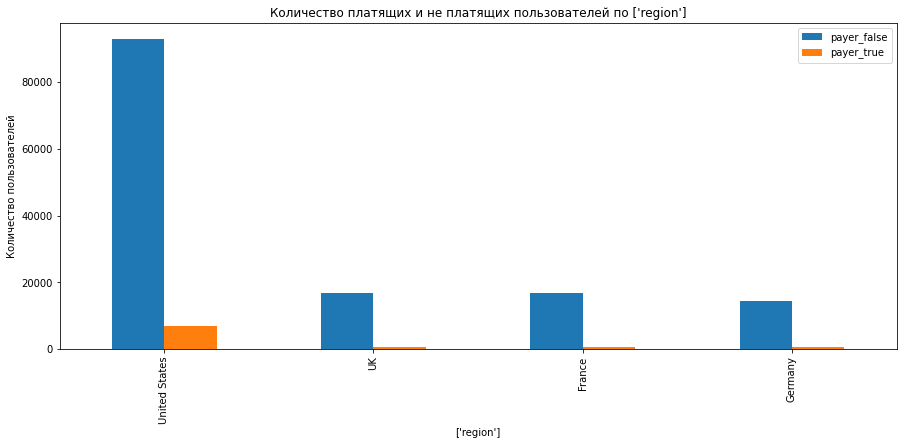

,payer_false,payer_true,percentage_of_payers
region,,,
United States,93100,6902,6.90
Germany,14365,616,4.11
UK,16875,700,3.98
France,16787,663,3.80


In [22]:
for_3_chapter(profiles, ['region'])

В приложение приходят пользователи из Франции, Германии, Великобритании и США.

Больше всего платящих пользователей в США - 6,9%; в Германии - 4,11%; в Великобритании - 3,98%, во Франции - 3,8%.

Также больше всего пользователей приложения находятся в США.

### Анализ устройств пользователей

,payer_false,payer_true
device,,
iPhone,51097,3382
Android,32982,2050
PC,28918,1537
Mac,28130,1912


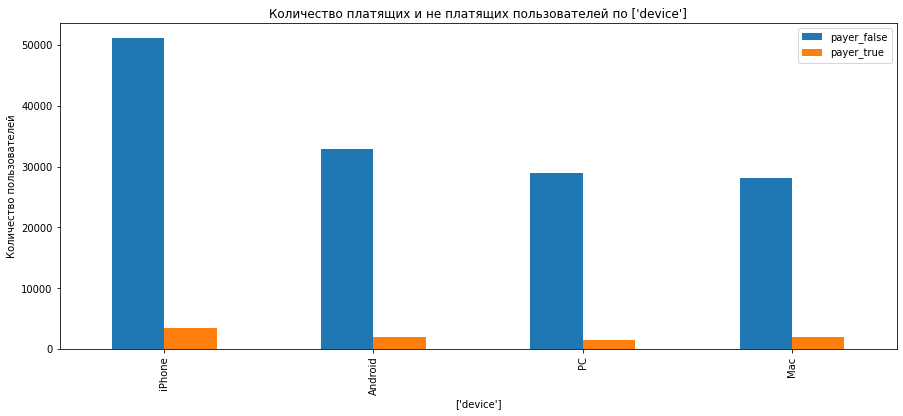

,payer_false,payer_true,percentage_of_payers
device,,,
Mac,28130,1912,6.36
iPhone,51097,3382,6.21
Android,32982,2050,5.85
PC,28918,1537,5.05


In [23]:
for_3_chapter(profiles, ['device'])

Приложение чаще используют на смартфонах, при этом пользователей с айфонами значительно больше, чем с устройством на 
андроиде.

При этом среди пользователей, которые при первом входе в приложение использовали устройство на Mac, больше всего платящих - 6,36%, а на айфоне - 6,21%.

### Анализ каналов привлечения пользователей

,payer_false,payer_true
channel,,
organic,55279,1160
FaceBoom,25587,3557
TipTop,17683,1878
OppleCreativeMedia,8372,233
LeapBob,8291,262
WahooNetBanner,8100,453
MediaTornado,4208,156
YRabbit,4147,165
RocketSuperAds,4096,352


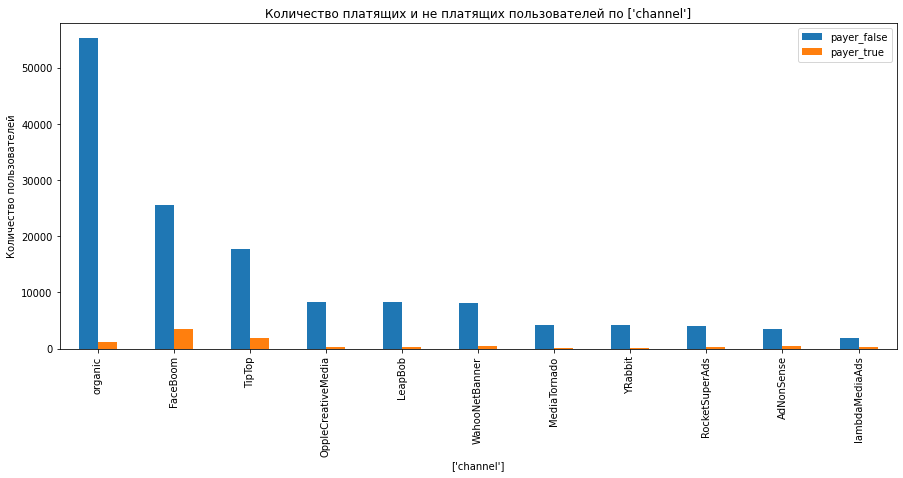

,payer_false,payer_true,percentage_of_payers
channel,,,
FaceBoom,25587,3557,12.20
AdNonSense,3440,440,11.34
lambdaMediaAds,1924,225,10.47
TipTop,17683,1878,9.60
RocketSuperAds,4096,352,7.91
WahooNetBanner,8100,453,5.30
YRabbit,4147,165,3.83
MediaTornado,4208,156,3.57
LeapBob,8291,262,3.06


In [24]:
for_3_chapter(profiles, ['channel'])

При разделении пользователей на группы по каналам привлечения самой многочисленной оказалась группа "organic", 56 тысяч пользователей пришли в приложения "органическим" путем, через поиск, на их привлечение бизнес не вкладывал деньги, однако пользователи, которые пришли не через рекламные источники имеют самый низкий процент платящих пользователей - 2,06%.

Самые высокие показатели платящих пользователей показывают следующие источники: FaceBoom - 12,2%, AdNonSense - 11,34% и lambdaMediaAds - 10,47%.

## 4. Маркетинг


In [25]:
print('Общая сумма расходов на маркетинг за исследуемый период с 1 мая 2019 по 27 октября 2019 составила {} у.е.'
      .format(f"{(costs['costs'].sum()):,.2f}"))

Общая сумма расходов на маркетинг за исследуемый период с 1 мая 2019 по 27 октября 2019 составила 105,497.30 у.е.


In [26]:
costs.head()

,dt,channel,costs
0,2019-05-01,FaceBoom,113.30
1,2019-05-02,FaceBoom,78.10
2,2019-05-03,FaceBoom,85.80
3,2019-05-04,FaceBoom,136.40
4,2019-05-05,FaceBoom,122.10


In [27]:
aa = costs.pivot_table(
    index='channel',
    values = 'costs',
    aggfunc=['sum']
)

aa.sort_values(by=('sum','costs'), ascending=False, inplace=True)
aa

,sum
,costs
channel,
TipTop,"54,751.30"
FaceBoom,"32,445.60"
WahooNetBanner,"5,151.00"
AdNonSense,"3,911.25"
OppleCreativeMedia,"2,151.25"
RocketSuperAds,"1,833.00"
LeapBob,"1,797.60"
lambdaMediaAds,"1,557.60"


Больше всего средств на рекламу вложено в продвижение через источники TipTop и FaceBoom.

In [28]:
costs['week'] = pd.to_datetime(costs['dt']).dt.isocalendar().week
costs.head()

,dt,channel,costs,week
0,2019-05-01,FaceBoom,113.30,18
1,2019-05-02,FaceBoom,78.10,18
2,2019-05-03,FaceBoom,85.80,18
3,2019-05-04,FaceBoom,136.40,18
4,2019-05-05,FaceBoom,122.10,18


In [29]:
aa = costs.pivot_table(
    index = ['week'] ,
    columns = 'channel',
    values = 'costs',
    aggfunc = 'sum'
)
aa

channel,AdNonSense,FaceBoom,LeapBob,MediaTornado,OppleCreativeMedia,RocketSuperAds,TipTop,WahooNetBanner,YRabbit,lambdaMediaAds
week,,,,,,,,,,
18,211.05,535.70,16.80,38.64,24.00,99.45,347.00,49.20,52.20,81.60
19,273.00,750.20,31.71,61.68,34.50,139.23,470.00,92.40,75.90,103.20
20,265.65,755.70,26.67,59.04,27.50,138.06,454.00,90.00,69.30,90.40
21,266.70,722.70,26.67,50.16,34.25,131.04,801.80,79.20,65.40,119.20
22,202.65,"1,208.90",65.52,36.96,81.75,97.70,"1,421.20",179.40,49.80,83.20
23,102.90,"1,081.30",66.99,27.60,79.50,76.05,"1,223.60",196.80,25.80,35.20
24,96.60,"1,042.80",52.29,29.76,71.50,63.18,"1,121.00",166.20,17.46,45.60
25,141.75,"1,280.40",68.46,32.16,79.75,80.73,"1,474.40",201.60,22.14,40.00
26,148.05,"1,647.80",99.75,40.56,107.00,78.26,"2,343.60",285.00,27.90,59.20


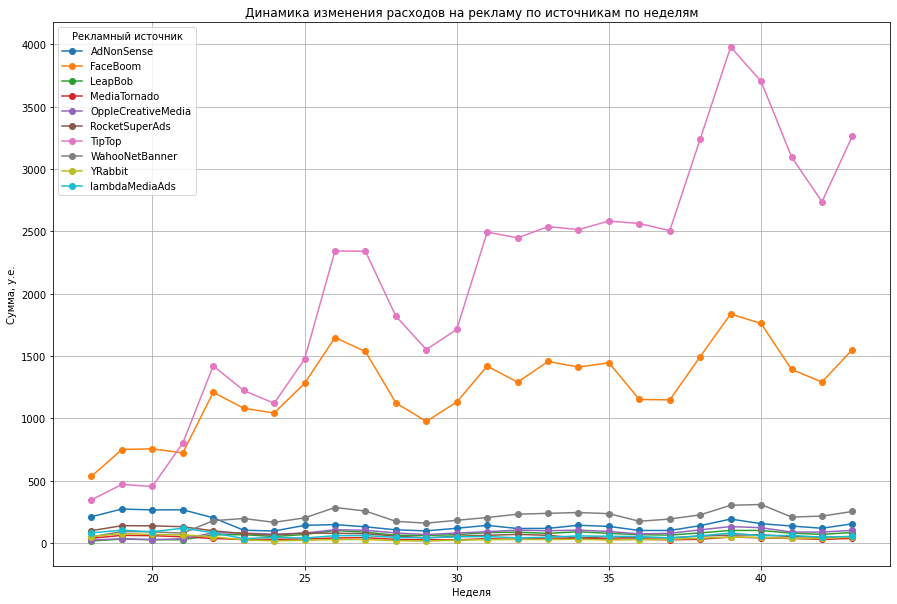

In [30]:
aa.plot(kind='line', marker='o', figsize=(15, 10))
plt.title('Динамика изменения расходов на рекламу по источникам по неделям')
plt.xlabel('Неделя')
plt.ylabel('Сумма, у.е.')
plt.legend(title='Рекламный источник')
plt.grid(True)
plt.show()

Больше всего компания вкладывает средств в продвижение приложения через рекламный источник TipTop, при этом по таблице из раздела 3 пункта 4 установлено, что пользователи привлеченные через данный канал, не входят в тройку самых платящих.

Также значительно больше средств, чем в другие каналы, вложено в привлечение пользователей через рекламный источник FaceBoom, но пользователи из этого источника являются самой платящей группой.

Кроме того, рекламные источники FaceBoom и TipTop показывают рост за исследуемый период, когда остальные источники рекламы находятся на примерно одном уровне расходов. 

При этом по рекламному источнику TipTop на 38 и 39 неделях наблюдается значительный рост, а начиная с 40 недели расходы по данному источнику снижаются.

In [31]:
costs['month'] = pd.to_datetime(costs['dt']).dt.month
aa = costs.pivot_table(
    index = ['month'] ,
    columns = 'channel',
    values = 'costs',
    aggfunc = 'sum'
)
aa

channel,AdNonSense,FaceBoom,LeapBob,MediaTornado,OppleCreativeMedia,RocketSuperAds,TipTop,WahooNetBanner,YRabbit,lambdaMediaAds
month,,,,,,,,,,
5,"1,169.70","3,524.40",140.28,238.56,169.75,577.98,"2,981.00",418.80,299.70,458.40
6,538.65,"5,501.10",314.58,138.00,370.00,325.72,"6,675.60",921.00,106.20,199.20
7,504.00,"5,294.30",313.53,138.48,366.50,252.07,"8,410.20",851.40,97.38,219.20
8,579.60,"6,274.40",369.81,154.56,439.25,253.11,"11,202.00","1,040.40",124.74,220.00
9,581.70,"6,114.90",343.98,144.72,427.75,218.40,"13,232.50",977.40,152.79,247.20
10,537.60,"5,736.50",315.42,140.16,378.00,205.73,"12,250.00",942.00,163.41,213.60


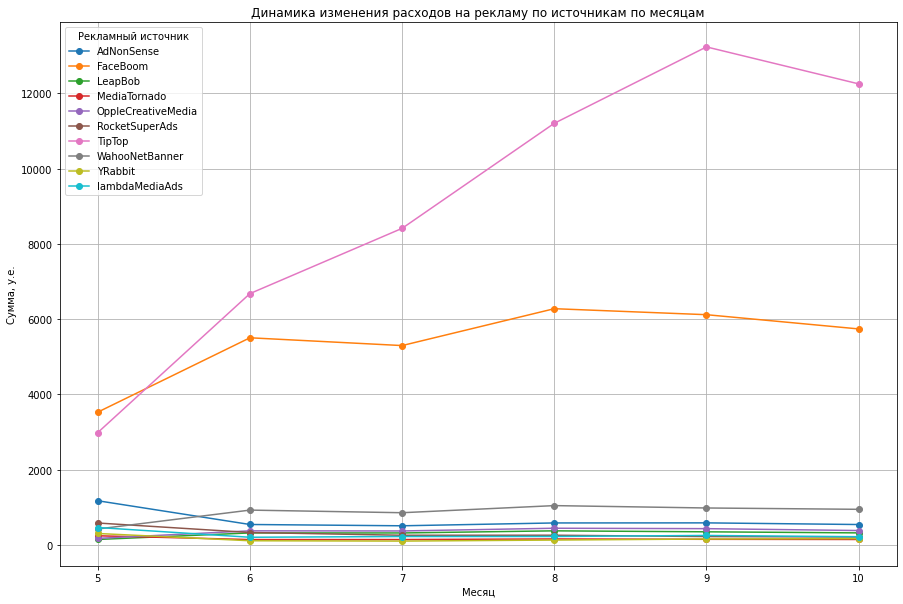

In [32]:
aa.plot(kind='line', marker='o', figsize=(15, 10))
plt.title('Динамика изменения расходов на рекламу по источникам по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Сумма, у.е.')
plt.legend(title='Рекламный источник')
plt.grid(True)
plt.show()

Динамика по месяцам показывает аналогичные результаты как и по неделям. Компания вкладывает больше всего средств в продвижение приложения через рекламный источник TipTop и FaceBoom. В мае больше средств было потрачено на продвижение через FaceBoom, но уже в июне и до октября компания больше тратила денег на рекламу через TipTop. При этом расходы на рекламу через TipTop имеют существенный рост, когда расходы по FaceBoom растут не так значительно, а по другим источникам расходы ежемесячные держатся примерно на одном уровне.

In [33]:
#строим таблицу, чтобы узнать сколько в среднем стоило привлечение 1 пользователя
#через каждый источник рекламы
cac = profiles.groupby('channel').agg({'acquisition_cost':'mean'}).rename(columns={'acquisition_cost': 'cac'})
cac.sort_values(by='cac', ascending=False, inplace=True)
cac

,cac
channel,
TipTop,2.80
FaceBoom,1.11
AdNonSense,1.01
lambdaMediaAds,0.72
WahooNetBanner,0.60
RocketSuperAds,0.41
OppleCreativeMedia,0.25
YRabbit,0.22
MediaTornado,0.22


В среднем стоимость привлечения одного пользователя значительно дороже через источник TipTop и составляет 2,8 у.е., через FaceBoom дешевле более чем в 2 раза - 1,11 у.е. Привлечение пользователей через другие источники стоит значительно меньше, чем через эти источники.

In [34]:
aa = profiles.pivot_table(
    index='month',
    columns = 'channel',
    values = 'acquisition_cost',
    aggfunc = 'mean'
).drop('organic', axis=1)

aa

channel,AdNonSense,FaceBoom,LeapBob,MediaTornado,OppleCreativeMedia,RocketSuperAds,TipTop,WahooNetBanner,YRabbit,lambdaMediaAds
month,,,,,,,,,,
2019-05-01,1.03,1.11,0.20,0.23,0.24,0.55,1.36,0.58,0.28,0.75
2019-06-01,1.01,1.12,0.21,0.22,0.25,0.50,2.08,0.60,0.18,0.73
2019-07-01,0.99,1.11,0.21,0.22,0.25,0.42,2.65,0.61,0.16,0.72
2019-08-01,1.00,1.11,0.21,0.22,0.25,0.35,3.01,0.61,0.19,0.69
2019-09-01,1.00,1.11,0.21,0.21,0.25,0.30,3.48,0.60,0.21,0.71
2019-10-01,0.99,1.11,0.21,0.21,0.25,0.29,3.54,0.61,0.23,0.71


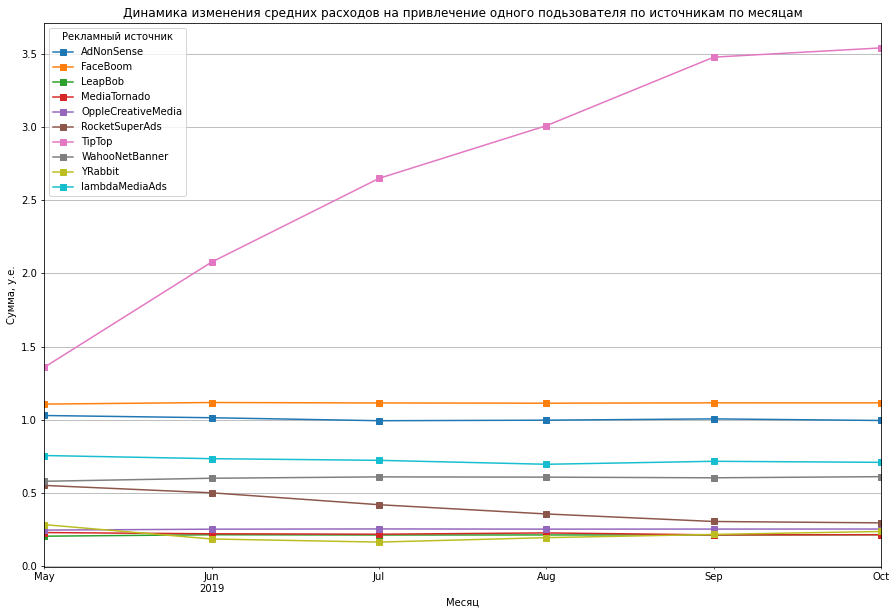

In [35]:
aa.plot(kind='line', figsize=(15, 10), marker='s')
plt.title('Динамика изменения средних расходов на привлечение одного подьзователя по источникам по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Сумма, у.е.')
plt.legend(title='Рекламный источник')
plt.grid(True)
plt.show()

При этом, если смотреть на динамику средних расходов на привлечение одного пользователя по месяцам с разбивкой по источникам рекламы видно, что стоимость через источник TipTop растет примерно пропорционально росту расходов на рекламу по месяцам, когда FaceBoom имеет стабильную стоимость привлечения одного пользователя, хотя тоже в течение периода был рост общих затрат на рекламу через данный канал. Это говорит о том, что расходы на продвижение через TipTop были увеличены, однако пользователей приходить больше пропорционально росту расходов не стало, таким образом, средние расходы на привлечение одного пользователя через TipTop возросли.

По источнику RocketSuperAds средние расходы на привлечение одного пользователя снизились за исследуемый период. По остальным источникам рекламы средние расходы на привлечение пользователя стабильны.

## 5. Оценка окупаемость рекламы




In [36]:
observation_date = datetime(2019, 10, 28).date()  # момент анализа установлен такой, хотя по условию сегодня 1.11
# в дф есть данные только до 27.10.19
horizon_days = 14  # горизонт анализа 

### Анализ общей окупаемости рекламы

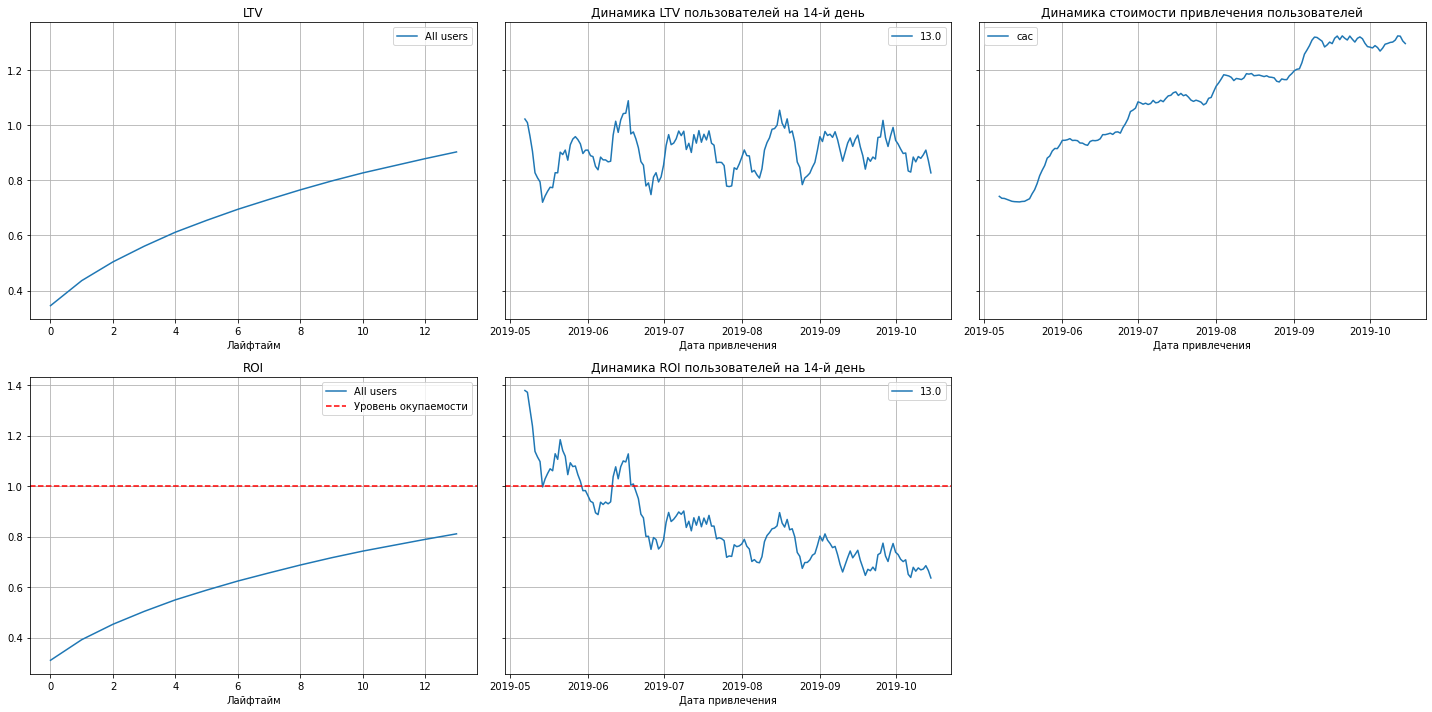

In [37]:
profiles_for_chapter_5 = profiles.query('channel != "organic"')
# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_for_chapter_5, orders, observation_date, horizon_days
)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

Стоимость привлечения пользователей за период значительно выросла, ROI за 2 недели не достигает уровня окупаемости, при этом, если смотреть динамику окупаемости привлечения пользователей на 14 день, то до начала июня 2019 года рекламные инвестиции окупались, дальше уровень окупаемости не достигался, при этом наблюдается стабильное снижение ROI на 14 день. Реклама направленная на привлечение пользователей в целом не окупается.


### Конверсия и удержание пользователей

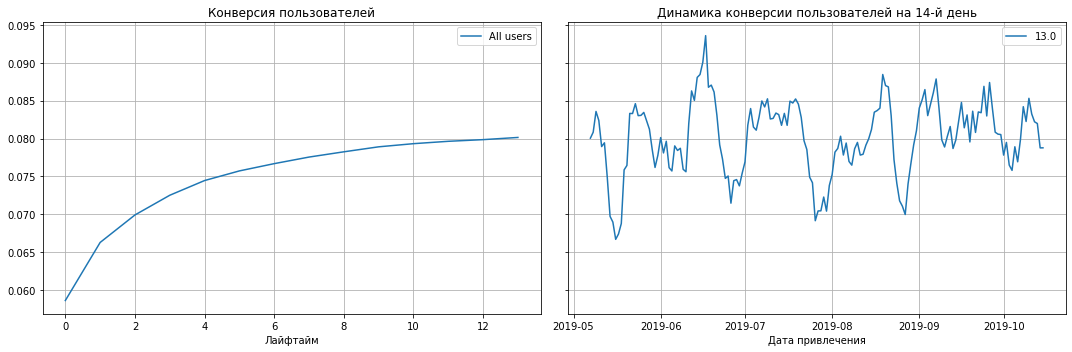

In [38]:
# смотрим конверсию 

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_for_chapter_5, orders, observation_date, horizon_days
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

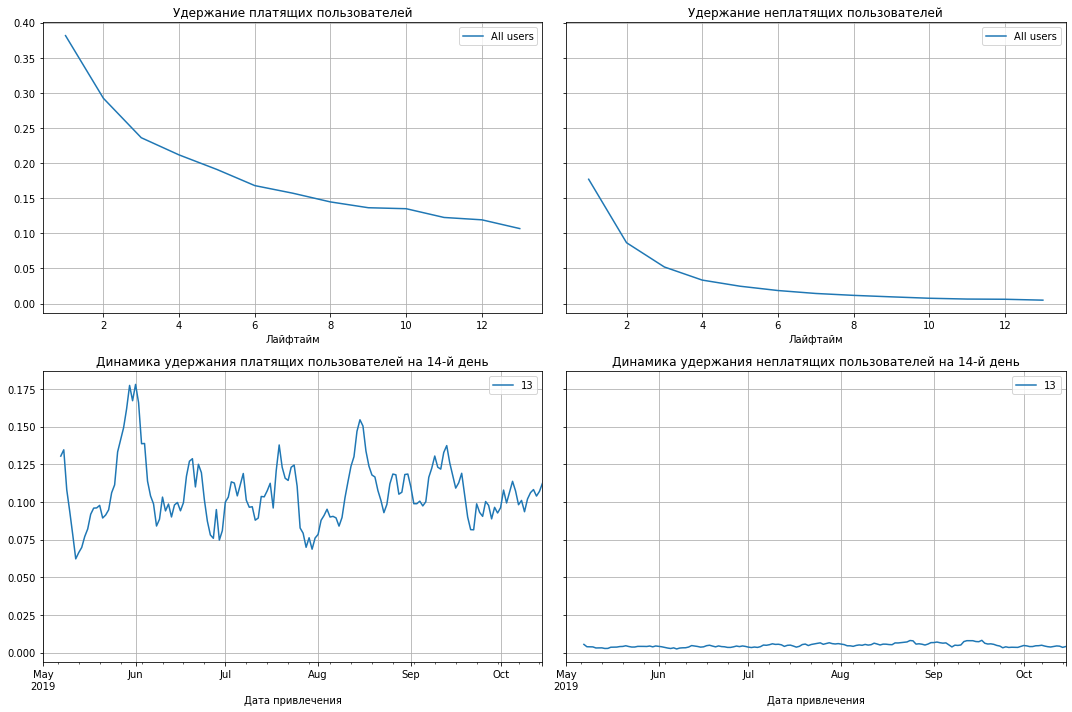

In [39]:
# смотрим удержание

retention_raw, retention_grouped, retention_history = get_retention(
    profiles_for_chapter_5, visits, observation_date, horizon_days
)

plot_retention(retention_grouped, retention_history, horizon_days)

Удержание для платящих пользователей выше, чем для неплатящих.

### Анализ окупаемости рекламы с разбивкой по устройствам

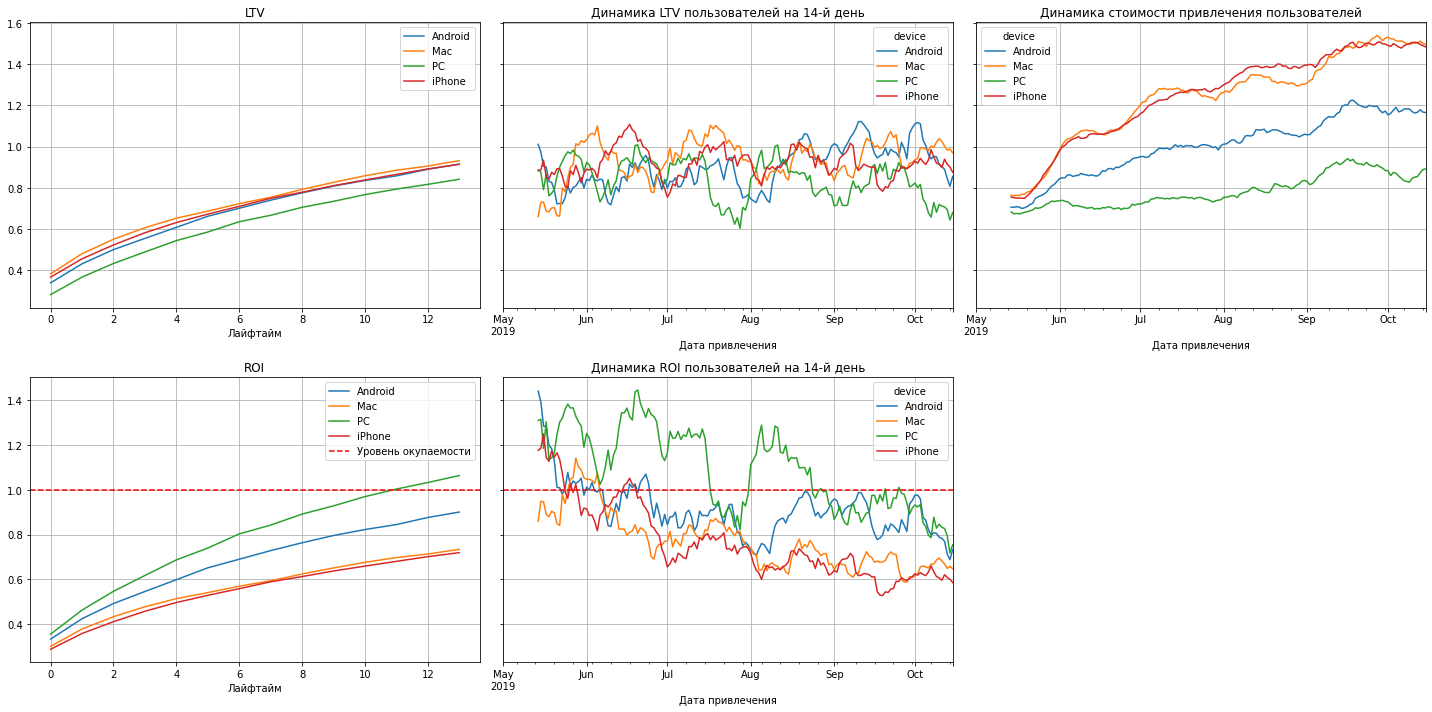

In [40]:
# смотрим окупаемость с разбивкой по устройствам

dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_for_chapter_5, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

Привлечение пользователей на РС стоит меньше, чем с других устройств.

Пользователи с РС окупаеются в среднем за 11 дней, осталные пользователи окупаются за 2 недели. При в первой половине мая пользователи всех устройств кроме Мас окупались за 2 недели, далее динамика окупаемости на 14 день стала стабильно снижаться.

Также наблюдается динамика к росту стоимости привлечения пользователей на всех устройствах.

### Анализ окупаемости рекламы с разбивкой по странам

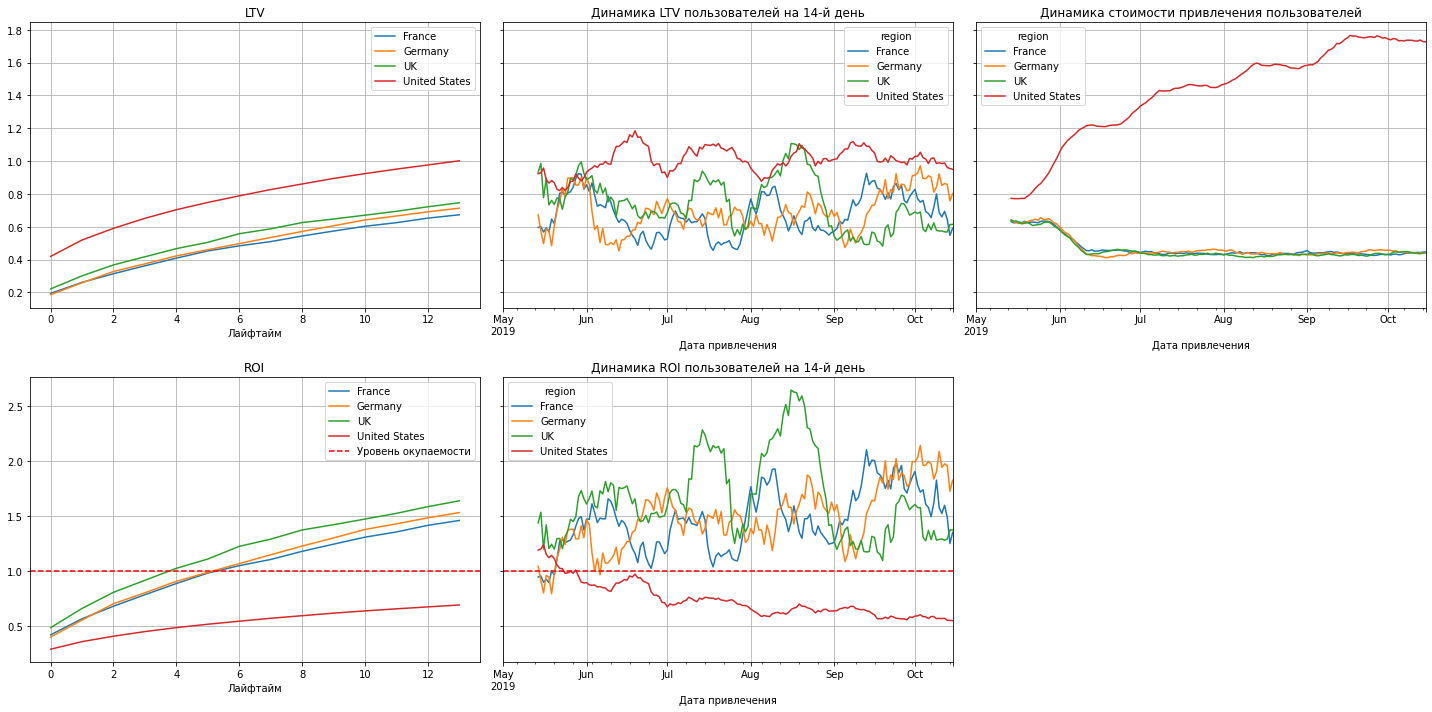

In [41]:
# смотрим окупаемость с разбивкой по странам

dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_for_chapter_5, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

Наблюдается значительный рост стоимости привлечения пользователей начиная с июня по США, при этом по другим странам данный показатель снижается с начала до середины июня, а дальше был стабилен. Также по всем странам кроме США за 2 недели ROI достигает точки окупаемости (в Великобритании уровень окупаемости в среднем достигается за 4 дня, а в Германии и Франции за 5). При этом, если рассматривать динамику ROI на 14 день, то видна тенденция, что начиная с конца мая ROI по США не достигает уровня окупаемости. 
Показатели по США являются приоритетными, так как около 65% пользователей приложения из США.

### Анализ окупаемости рекламы с разбивкой по каналам привлечения

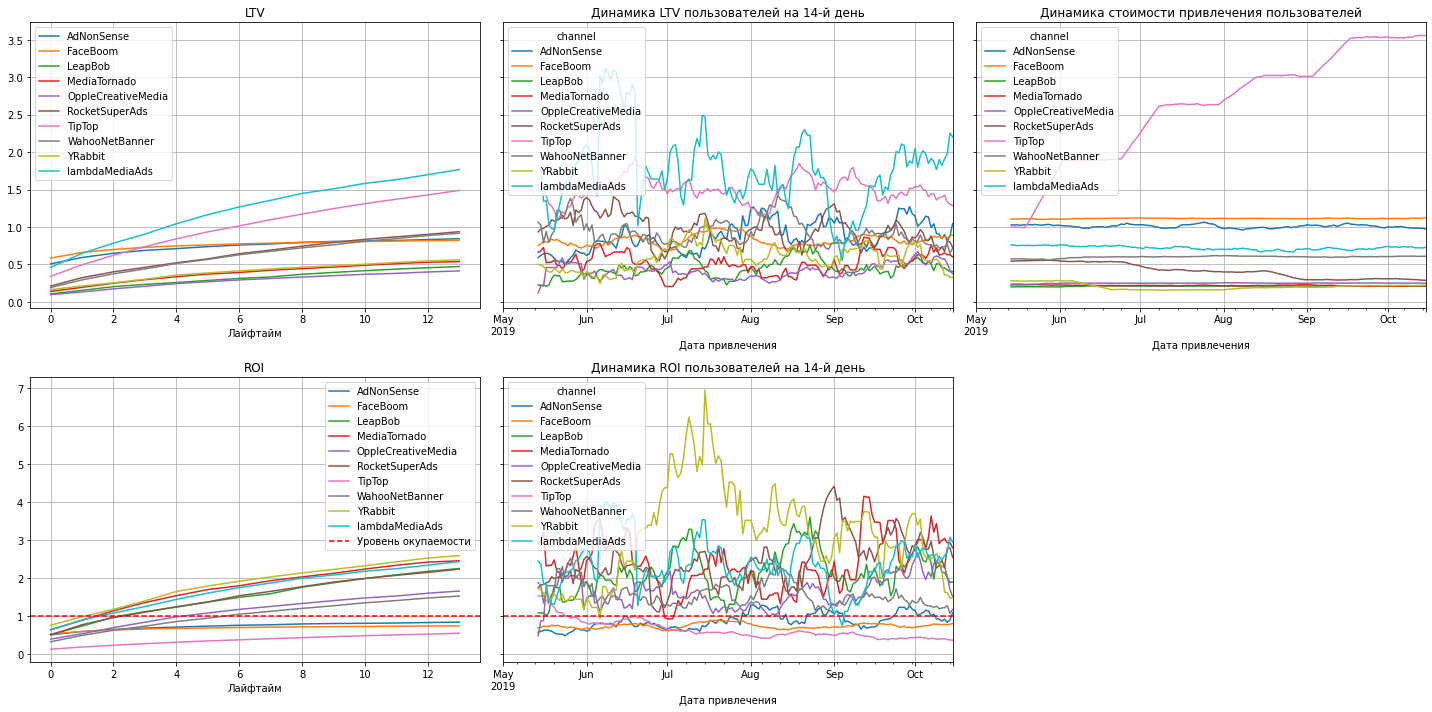

In [42]:
# смотрим окупаемость с разбивкой по каналам привлечения

dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_for_chapter_5, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

На 14 день пользователи привлеченные через AdNonSense, FaceBoom и TipTop не окупили затрат на свое привлечение. При этом в отношении ROI TipTop и FaceBoom данная ситуация стабильна, пользователи привлеченный через эти ресурсы, почти весь исследуемый период за две недели не окупают затрат на свое привлечение.

### Анализ пользователей привлеченных через неэффективные рекламные каналы

In [43]:
channel_list = ['AdNonSense', 'FaceBoom', 'TipTop']

In [44]:
short_profiles = profiles_for_chapter_5.query('channel in @channel_list')
print(short_profiles['channel'].unique())
short_profiles.head()

['FaceBoom' 'AdNonSense' 'TipTop']


,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.09
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.11
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.99
7,46006712,2019-06-30 03:46:29,AdNonSense,Android,France,2019-06-30,2019-06-01,True,1.01
8,58263264,2019-05-11 19:18:43,FaceBoom,iPhone,United States,2019-05-11,2019-05-01,False,1.13


In [45]:
short_profiles.pivot_table(
    index = 'region',
    columns = 'channel',
    values = 'acquisition_cost',
    aggfunc = ['count', 'sum']
)

count                            sum                    
channel       AdNonSense  FaceBoom    TipTop AdNonSense  FaceBoom    TipTop
region                                                                     
France          1,366.00       NaN       NaN   1,376.32       NaN       NaN
Germany         1,219.00       NaN       NaN   1,229.28       NaN       NaN
UK              1,295.00       NaN       NaN   1,305.65       NaN       NaN
United States        NaN 29,144.00 19,561.00        NaN 32,445.60 54,751.30

Самые неэффективные рекламные каналы (FaceBoom и TipTop) используются только на пользователей США. 

count                   
device         Android   Mac    PC iPhone
channel                                  
FaceBoom          5875  7265  3008  12996
MediaTornado       879  1105   453   1927
RocketSuperAds     928  1137   466   1917
TipTop            3889  4820  2012   8840
YRabbit            865  1097   482   1868

sum                             
device           Android       Mac       PC    iPhone
channel                                              
FaceBoom        6,540.84  8,088.08 3,349.23 14,467.46
MediaTornado      193.11    242.29    98.64    420.45
RocketSuperAds    382.81    465.72   190.37    794.10
TipTop         10,862.07 13,550.21 5,681.47 24,657.55
YRabbit           189.90    239.32   104.41    410.59

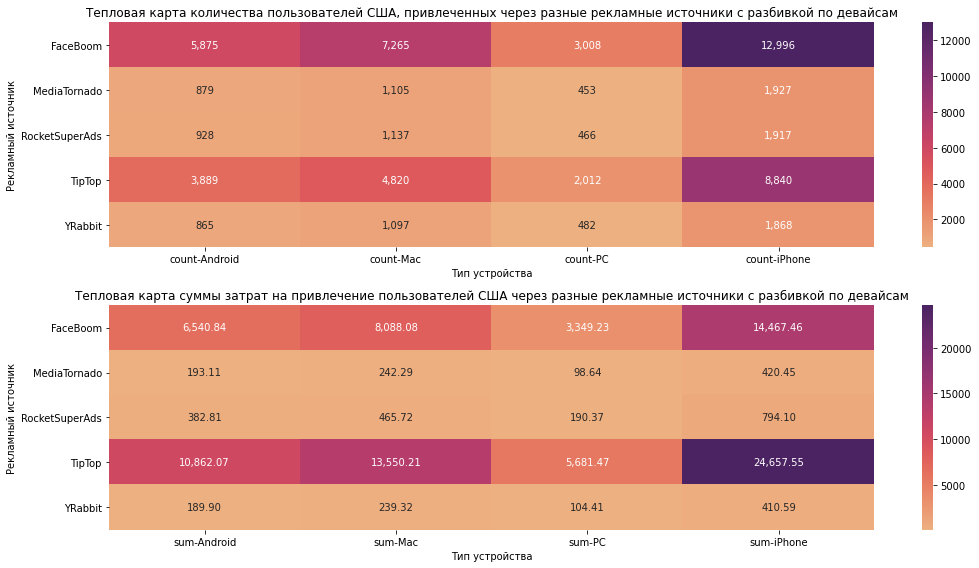

In [46]:
#создаю сводную таблицу для США по каналам привлечения и девайсу отражается количество пользователей
#органических пользователей исключаю
aa = profiles_for_chapter_5.query('region == "United States" and channel != "organic"').pivot_table(
    index=['channel'],
    columns = 'device',
    values = 'acquisition_cost',
    aggfunc = ['count']
)
display(aa)

# строю такую же сводну, но по сумме затрат на привлечение пользователей
bb = profiles_for_chapter_5.query('region == "United States" and channel != "organic"').pivot_table(
    index=['channel'],
    columns = 'device',
    values = 'acquisition_cost',
    aggfunc = ['sum']
)
display(bb)

# Создаю сетку для графиков 
fig, axes = plt.subplots(2, 1, figsize=(15, 8))

# Строю тепловую карту для количественной таблицы
sns.heatmap(aa, annot=True, cmap='flare', fmt=',.0f', ax=axes[0])
axes[0].set_xlabel('Тип устройства')
axes[0].set_ylabel('Рекламный источник')
axes[0].set_title(
    'Тепловая карта количества пользователей США, \
привлеченных через разные рекламные источники с разбивкой по девайсам')


# Строю тепловую карту для суммовой таблицы
sns.heatmap(bb, annot=True, cmap='flare', fmt=',.2f', ax=axes[1])
axes[1].set_xlabel('Тип устройства')
axes[1].set_ylabel('Рекламный источник')
axes[1].set_title(
    'Тепловая карта суммы затрат на привлечение пользователей США \
через разные рекламные источники с разбивкой по девайсам')

# Регулируем расположение подграфиков
plt.tight_layout()

# Показываем график
plt.show()

Через рекламные источники FaceBoom и TipTop привлечено в разы больше пользователей из США, чем через остальные источники, при этом среди них много пользователей пользующихся iPhone. Больше количественно пользователей привлечено через FaceBoom, однако денежных затрат больше по каналу TipTop. Пользователи привелеченные через канал TipTop являются самыми дорогими.

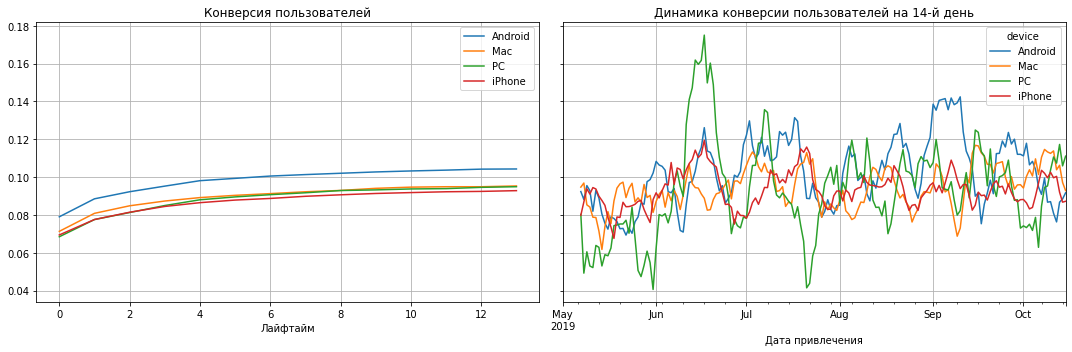

In [47]:
#смотрю конверсию c разбивкой по девайсам в США

dimensions = ['device']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_for_chapter_5.query('region == "United States" and channel != "organic"'), 
    orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

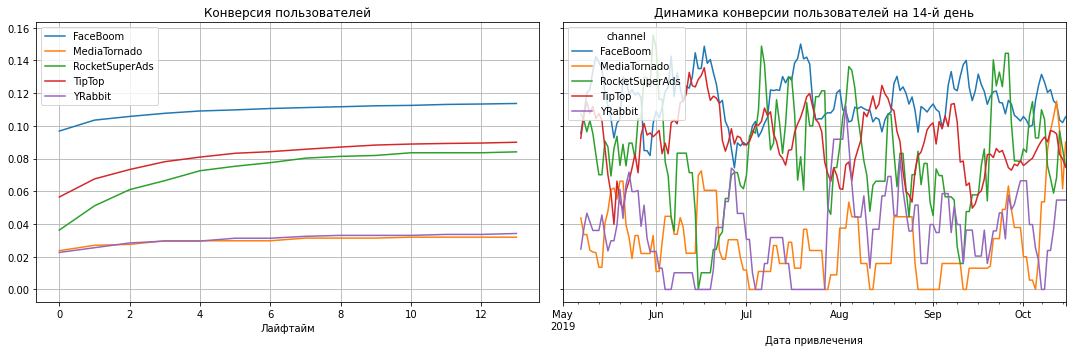

In [48]:
#смотрю конверсию c разбивкой по каналам рекламы в США для айфонов

dimensions = ['channel']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_for_chapter_5.query('region == "United States" and channel != "organic" and device == "iPhone"'),
    orders, 
    observation_date, 
    horizon_days, 
    dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

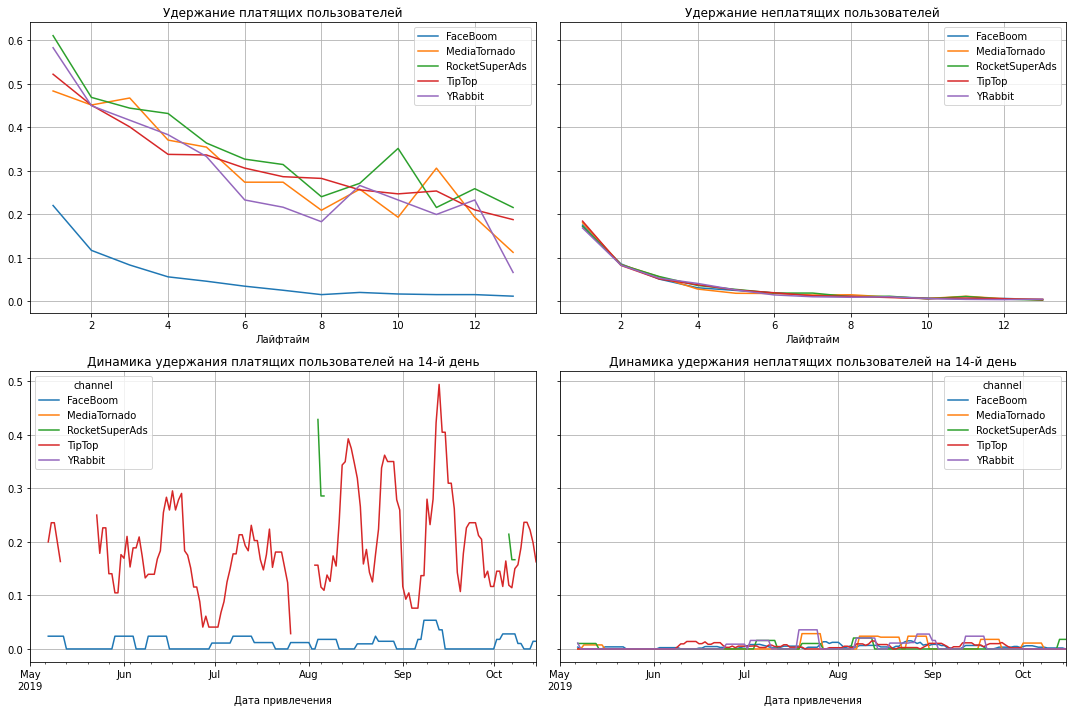

In [49]:
# смотрим удержание с разбивкой по каналам для США, пользователи с айфонами

retention_raw, retention_grouped, retention_history = get_retention(
    profiles_for_chapter_5.query('region == "United States" and device == "iPhone"'),
    visits, 
    observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, 14)

Удержание платящих пользоватей с iPhone в США привлеченных через FaceBoom значительно ниже, чем пришедших из другого канала привлечения. При этом удержание платящих пользователей пришедших через FaceBoom примерно такое же как неплатящих.

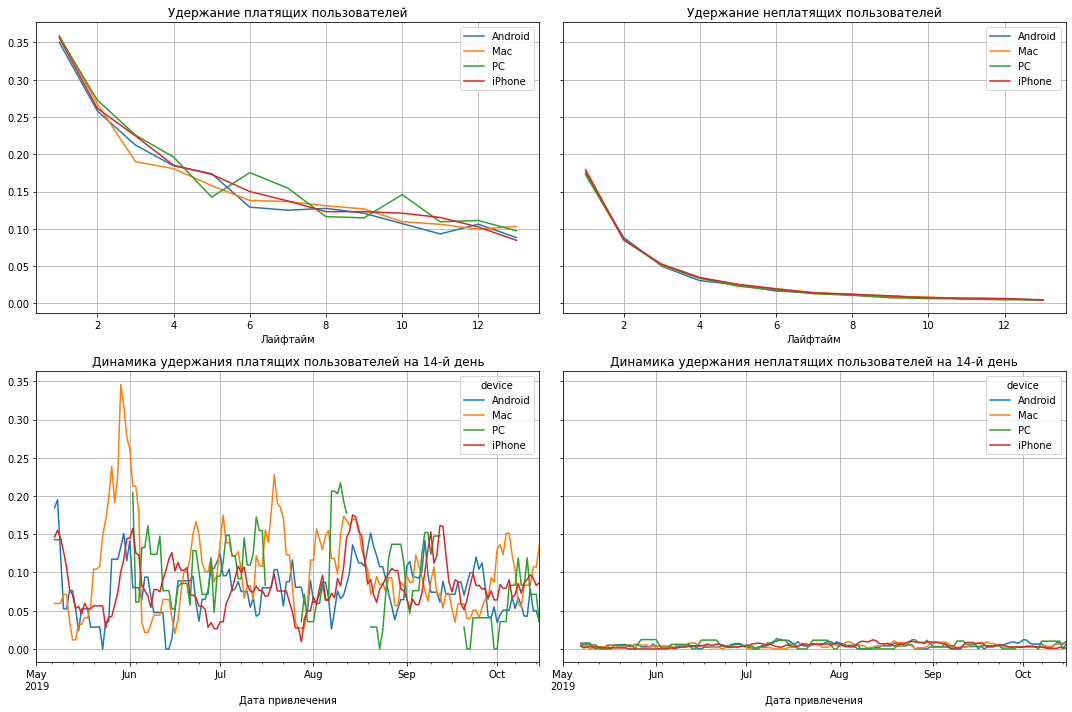

In [50]:
# смотрим удержание с разбивкой по устройству для США
dimensions = ['device']

retention_raw, retention_grouped, retention_history = get_retention(
    profiles_for_chapter_5.query('region == "United States" and channel != "organic"'),
    visits, 
    observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, 14)

Различий значительных в удержании по устройствам нет

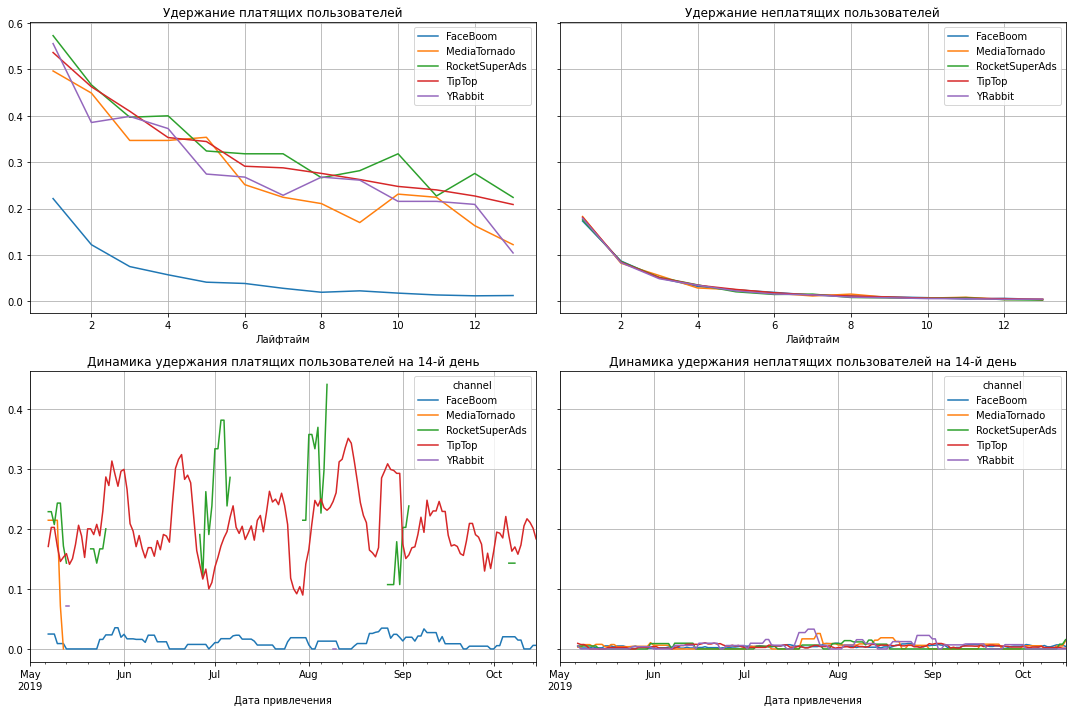

In [51]:
#строю графики удержаний по всем устройствам для США с разбивкой по каналам

dimensions = ['channel']

retention_raw, retention_grouped, retention_history = get_retention(
    profiles_for_chapter_5.query('region == "United States"'),
    visits, 
    observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, 14)

По всем устройствам ситуация аналогичная, как и с айфонами, удержание платящих пользователей, пришедших из FaceBoom значительно ниже, чем по остальным источникам. Причем удержание пользователей из FaceBoom практически одинаковое как у платящих, так и у не платящих.

In [52]:
ss = orders.merge(profiles_for_chapter_5[['channel','user_id', 'region', 'device', 'payer']])
ss.query('region == "United States"').pivot_table(
    index='channel',
    values = 'revenue',
    aggfunc = 'count'
)

,revenue
channel,
FaceBoom,4734
MediaTornado,1068
RocketSuperAds,2168
TipTop,13024
YRabbit,1157


In [53]:
ss = ss.query('region == "United States"').pivot_table(
    index='channel',
    values = 'user_id',
    aggfunc = ['count','nunique']
)
ss.columns = ['count_of_orders', 'count_of_unique_users']
ss['orders_per_user'] = ss['count_of_orders']/ss['count_of_unique_users']
ss

,count_of_orders,count_of_unique_users,orders_per_user
channel,,,
FaceBoom,4734,3557,1.33
MediaTornado,1068,156,6.85
RocketSuperAds,2168,352,6.16
TipTop,13024,1878,6.94
YRabbit,1157,165,7.01


Пользователи, привлеченные через рекламный источник FaceBoom в среднем делают одну покупку. Данная ситуация влияет на неокупаемость рекламных вложений. Возможно, это связано с условиями в рекламе для привлеченных пользователей через этот источник, например, для привлечения предлагают очень выгодную скидку или промокод, но после совершения первой покупки пользователи уже на базовые условия не согласны. 

## 6. Общие выводы


Рассматриваемое приложение используется пользователями из Франции, Германии, Великобритании и США. При этом более 65% этих пользователей из США. Также больше всего платящих пользователей в США - 6,9% от всех пользователей приложения в этом регионе; в Германии - 4,11%; в Великобритании - 3,98%, во Франции - 3,8%.

Приложение чаще используют на смартфонах, при этом пользователей с айфонами значительно больше, чем с устройством на 
андроиде. При этом среди пользователей, которые при первом входе в приложение использовали устройство на Mac, больше всего платящих - 6,36%, а на айфоне - 6,21%.

При разделении пользователей на группы по каналам привлечения самой многочисленной оказалась группа "organic", 56 тысяч пользователей пришли в приложения "органическим" путем, через поиск, на их привлечение бизнес не вкладывал деньги, однако пользователи, которые пришли не через рекламные источники имеют самый низкий процент платящих пользователей - 2,06%. Самые высокие показатели платящих пользователей показывают следующие источники: FaceBoom - 12,2%, AdNonSense - 11,34% и lambdaMediaAds - 10,47%.

Общая сумма расходов на маркетинг за исследуемый период с 1 мая 2019 по 27 октября 2019 составила 105,497.30 у.е. Больше всего средств на рекламу вложено в продвижение через источники TipTop и FaceBoom.

Больше всего компания вкладывает средств в продвижение приложения через рекламный источник TipTop, при этом по таблице из раздела 3 пункта 4 установлено, что пользователи привлеченные через данный канал, не входят в тройку самых платящих.Также значительно больше средств, чем в другие каналы, вложено в привлечение пользователей через рекламный источник FaceBoom, но пользователи из этого источника являются самой платящей группой.

Компания вкладывает больше всего средств в продвижение приложения через рекламный источник TipTop и FaceBoom. В мае больше средств было потрачено на продвижение через FaceBoom, но уже в июне и до октября компания больше тратила денег на рекламу через TipTop. При этом расходы на рекламу через TipTop имеют существенный рост, когда расходы по FaceBoom растут не так значительно, а по другим источникам расходы ежемесячные держатся примерно на одном уровне.

В среднем стоимость привлечения одного пользователя значительно дороже через источник TipTop и составляет 2,8 у.е., через FaceBoom дешевле более чем в 2 раза - 1,11 у.е. Привлечение пользователей через другие источники стоит значительно меньше, чем через эти источники.

При этом, если смотреть на динамику средних расходов на привлечение одного пользователя по месяцам с разбивкой по источникам рекламы видно, что стоимость через источник TipTop растет примерно пропорционально росту расходов на рекламу по месяцам, когда FaceBoom имеет стабильную стоимость привлечения одного пользователя, хотя тоже в течение периода был рост общих затрат на рекламу через данный канал. Это говорит о том, что расходы на продвижение через TipTop были увеличены, однако пользователей приходить больше пропорционально росту расходов не стало, таким образом, средние расходы на привлечение одного пользователя через TipTop возросли.

По источнику RocketSuperAds средние расходы на привлечение одного пользователя снизились за исследуемый период. По остальным источникам рекламы средние расходы на привлечение пользователя стабильны.

Стоимость привлечения пользователей за период значительно выросла, ROI за 2 недели не достигает уровня окупаемости, при этом, если смотреть динамику окупаемости привлечения пользователей на 14 день, то до начала июня 2019 года рекламные инвестиции окупались, дальше уровень окупаемости не достигался, при этом наблюдается стабильное снижение ROI на 14 день. Реклама направленная на привлечение пользователей в целом не окупается.

Привлечение пользователей на РС стоит меньше, чем с других устройств. Пользователи с РС окупаеются в среднем за 11 дней, осталные пользователи окупаются за 2 недели. При в первой половине мая пользователи всех устройств кроме Мас окупались за 2 недели, далее динамика окупаемости на 14 день стала стабильно снижаться. Также наблюдается динамика к росту стоимости привлечения пользователей на всех устройствах.

Наблюдается значительный рост стоимости привлечения пользователей начиная с июня по США, при этом по другим странам данный показатель снижается с начала до середины июня, а дальше был стабилен. Также по всем странам кроме США за 2 недели ROI достигает точки окупаемости (в Великобритании уровень окупаемости в среднем достигается за 4 дня, а в Германии и Франции за 5). При этом, если рассматривать динамику ROI на 14 день, то видна тенденция, что начиная с конца мая ROI по США не достигает уровня окупаемости. Показатели по США являются приоритетными, так как около 65% пользователей приложения из США.

На 14 день пользователи привлеченные через AdNonSense, FaceBoom и TipTop не окупили затрат на свое привлечение. При этом в отношении ROI TipTop и FaceBoom данная ситуация стабильна, пользователи привлеченный через эти ресурсы, почти весь исследуемый период за две недели не окупают затрат на свое привлечение.

Самые неэффективные рекламные каналы (FaceBoom и TipTop) используются только на пользователей США.

Через рекламные источники FaceBoom и TipTop привлечено в разы больше пользователей из США, чем через остальные источники, при этом среди них много пользователей пользующихся iPhone. Больше количественно пользователей привлечено через FaceBoom, однако денежных затрат больше по каналу TipTop. Пользователи привелеченные через канал TipTop являются самыми дорогими.

По всем устройствам пользователей в США удержание платящих пользователей, пришедших из FaceBoom значительно ниже чем по остальным источникам. Причем удержание пользователей из FaceBoom практически одинаковое как у платящих, так и у не платящих. Платящие пользователи, привлеченные через рекламный источник FaceBoom в среднем делают одну покупку. Данная ситуация влияет на неокупаемость рекламных вложений, низкое удержание. Возможно, это связано с условиями в рекламе для привлеченных пользователей через этот источник, например, для привлечения предлагают очень выгодную скидку или промокод, но после совершения первой покупки пользователи уже на базовые условия не согласны. 

Таким образом, для выхода в плюс необходимо пересмотреть стратегию по использованию рекламных источников в США. Возможно, отказаться от использования FaceBoom, как источника привлечения, так как пользователей приходит относительно много, но покупок совершают мало, либо изменить целевую аудиторию, на которую настроена реклама в данном источнике. 